## **Caso Práctico: Campañas de Marketing con Ads Publicitarios en Redes Sociales**
El documento corresponde a un caso práctico que puede ser utilizado como guía para obtener información relevante al aplicar estadística descriptiva y visualización de datos.

### **Contexto empresarial**

Las campañas de marketing publicitarias en redes sociales son una fuente importante de conversión de ventas. Los datos utilizados en este caso práctico provienen de una campaña de marketing en redes sociales de una organización anónima. El objetivo es entender el impacto de Ads publicitarios en redes sociales en la conversión de ventas de un determinado producto ofertado. La empresa utilizó Google Adwords para monitorear la campaña y las conversiones.

### **Descripción de los datos**

Los datos corresponden a 11 variables:

- **ad_id**: un ID único para cada anuncio.
- **xyz_campaign_id**: un ID asociado a cada campaña publicitaria de la empresa XYZ.
- **fb_campaign_id**: un ID asociado a cómo Facebook rastrea cada campaña.
- **age**: edad de la persona a la que se le muestra el anuncio.
- **gender**: género de la persona a la que se le muestra el anuncio.
- **interest**: un código que especifica la categoría a la que pertenece el interés de la persona (los intereses son los mencionados en el perfil público de Facebook de la persona).
- **Impressions**: el número de veces que se mostró el anuncio.
- **Clicks**: número de clics en ese anuncio.
- **Spent**: cantidad pagada por la empresa XYZ a Facebook para mostrar ese anuncio.
- **Total_Conversion**: número total de personas que preguntaron sobre el producto después de ver el anuncio.
- **Approved_Conversion**: número total de personas que compraron el producto después de ver el anuncio.

## **1. Configuración Inicial y Carga de Datos**
Primero, configuraremos nuestro entorno de análisis e importaremos las bibliotecas necesarias.

In [1]:
# Importación de bibliotecas
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
path = kagglehub.dataset_download("loveall/clicks-conversion-tracking")
df = pd.read_csv(path + "/" + os.listdir(path)[0])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Análisis inicial**
Analizaremos la información inherente a las campañas para entender:
- Tipos de datos
- Número único de ads
- Número único de campañas

In [4]:
# Tipos de Datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# Número unico de ads y campañas
print("Número unico de Ads publicitarios enviados:", df['ad_id'].nunique())
print("Número unico de campañas publicitarias:", df['xyz_campaign_id'].nunique())
print("Número unico de campañas en Facebook:", df['fb_campaign_id'].nunique())

Número unico de Ads publicitarios enviados: 1143
Número unico de campañas publicitarias: 3
Número unico de campañas en Facebook: 691


#### **Insights relevantes**
- Se enviaron 1143 Ads únicos.
- La empresa XYZ realizó 3 campañas publicitarias.
- La empresa XYZ registro 691 campañas publicitarias en Facebook.
- No existen valores nulos o faltantes en los datos.

## **3. Análisis Estadístico Descriptivo**
### **3.1. Variables Numéricas**
Analizaremos la estructura de los datos, asi como tambien las medidas de tendencia y dispersión de las variables para entender:
- Distribuciones
- Valores nulos
- Valores atípicos

In [6]:
# Análisis descriptivo variables numéricas
def analyze_numeric_variables(df, type_list):
    """Análisis detallado de variables numéricas"""
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Estadísticos descriptivos
    df = df.select_dtypes(include=type_list)
    total_rows = df.shape[0]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    atipicos = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    summary = pd.DataFrame(columns=df.columns)
    summary.loc['conteo_registros'] = total_rows
    summary.loc['conteo_nulos'] = df.isnull().sum()
    summary.loc['porcentaje_nulos'] = df.isnull().sum() / total_rows * 100
    summary.loc['promedio'] = df.mean()
    summary.loc['desv_std'] = df.std()
    summary.loc['min'] = df.min()
    summary.loc['25%'] = Q1
    summary.loc['50%'] = df.median()
    summary.loc['75%'] = Q3
    summary.loc['max'] = df.max()
    summary.loc['IQR'] = IQR
    summary.loc['atipicos'] = atipicos
    summary.loc['porcentaje_atipicos'] = atipicos / total_rows * 100

    return summary

# Realizamos el análisis sin incluir los ids unicos de Ads y campañas
analyze_numeric_variables(df.drop(["ad_id", "xyz_campaign_id", "fb_campaign_id"], axis=1), type_list=["int64", "float64"])

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
conteo_registros,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
conteo_nulos,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
porcentaje_nulos,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
promedio,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
desv_std,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


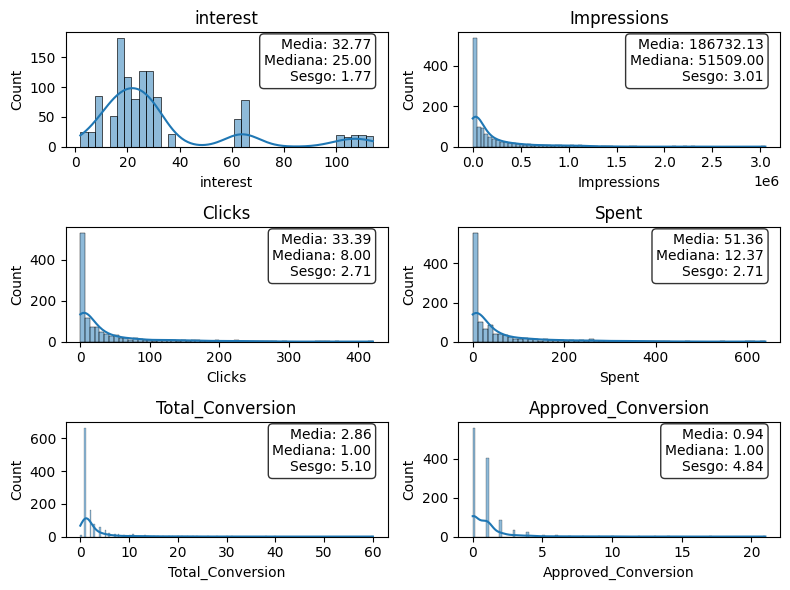

In [7]:
# Lista variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
numeric_cols = [column for column in numeric_cols if column not in ["ad_id", "xyz_campaign_id", "fb_campaign_id"]]

# Visualización variables numéricas
def visualize_numeric_variables(df, numeric_cols):
    """Visualización de distribuciones"""
    fig, axes = plt.subplots(len(numeric_cols)//2 + len(numeric_cols)%2, 2,
                             figsize=(8, 2*len(numeric_cols)//2))
    axes = axes.ravel()

    for idx, col in enumerate(numeric_cols):
        # Histograma con KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'{col}')

        # Añadir estadísticas relevantes
        stats_text = f'Media: {df[col].mean():.2f}\n'
        stats_text += f'Mediana: {df[col].median():.2f}\n'
        stats_text += f'Sesgo: {df[col].skew():.2f}'
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

visualize_numeric_variables(df, numeric_cols=numeric_cols)

Basado en la imagen se puede describir las características de las distribuciones.

**Interest (Interés)**

- Media: 32.77
- Mediana: 25.00
- Distribución bimodal con picos alrededor de 20 y 60-70

**Impressions (Impresiones)**

- Media: 186,732.13
- Mediana: 51,509.00
- Distribución altamente sesgada hacia la derecha, la mayoría de los valores están por debajo de 500,000

**Clicks (Clics)**

- Media: 33.39
- Mediana: 8.00
- Distribución muy sesgada con la mayoría de los valores cercanos a cero

**Spent (Gasto)**

- Media: 51.36
- Mediana: 12.37
- Distribución similar a los clics, muy sesgada hacia valores bajos

**Total_Conversion (Conversión Total)**

- Media: 2.86
- Mediana: 1.00
- Alta concentración en valores muy bajos (0-5)

**Approved_Conversion (Conversión Aprobada)**

- Media: 0.94
- Mediana: 1.00
- La mayoría de los valores están entre 0 y 2

**Insights relevantes**

- Alta disparidad entre media y mediana: En casi todas las métricas, la media es significativamente mayor que la mediana, lo que indica distribuciones muy sesgadas con algunos valores extremadamente altos que elevan el promedio.
- Eficiencia de la campaña: El número de impresiones es alto (media ~187K), pero esto se traduce en pocos clics (media ~33) y aún menos conversiones (media ~2.9). Esto sugiere una tasa de conversión bastante baja.
- Interés bimodal: La distribución del interés muestra dos picos distintos, lo que podría indicar dos segmentos diferentes de audiencia o dos tipos de contenido/productos con niveles de interés diferentes.
- Concentración en conversiones bajas: La gran mayoría de las instancias tienen muy pocas conversiones (tanto totales como aprobadas), lo que indica que el embudo de conversión tiene un cuello de botella significativo.
- Oportunidad de optimización: Dado que hay algunas instancias con valores altos en todas las métricas (como se ve en las colas largas de las distribuciones), hay potencial para identificar qué está funcionando bien en esos casos excepcionales y aplicarlo más ampliamente.
- ROI potencialmente bajo: Con un gasto medio de 51.36 y solo 0.94 conversiones aprobadas en promedio, es posible que el retorno de inversión necesite ser evaluado cuidadosamente.
- Sería recomendable identificar los factores que están generando los casos de mayor rendimiento y analizar si la segmentación actual está optimizada para alcanzar a la audiencia más receptiva.

### **3.2. Variables Categóricas**
Analizaremos la estructura de los datos, asi como tambien las proporciones de las categorias para entender:
- Distribuciones
- Valores nulos

In [8]:
# Análisis descriptivo variables categóricas
def analyze_categoric_variables(df, type_list):
    """Análisis detallado de variables categóricas"""
    df = df.select_dtypes(include=type_list)

    # Estadísticos descriptivos
    total_rows = df.shape[0]
    summary = pd.DataFrame(columns=df.columns)
    summary.loc['conteo_nulos'] = df.isnull().sum()
    summary.loc['porcentaje_nulos'] = df.isnull().sum() / total_rows * 100
    summary.loc['numero_categorias'] = df.nunique()
    summary.loc['max_categoria'] = df.mode().iloc[0]

    def max_cat_percentage(col):
        return col.value_counts(normalize=True).max() * 100

    summary.loc['porcentaje_max_cat'] = df.apply(max_cat_percentage)

    def min_category(col):
        return col.value_counts().idxmin()

    summary.loc['min_categoria'] = df.apply(min_category)

    def min_cat_percentage(col):
        return col.value_counts(normalize=True).min() * 100

    summary.loc['porcentaje_min_cat'] = df.apply(min_cat_percentage)

    return summary

analyze_categoric_variables(df, type_list=['object'])

,age,gender
conteo_nulos,0.0,0.0
porcentaje_nulos,0.0,0.0
numero_categorias,4.0,2.0
max_categoria,30-34,M
porcentaje_max_cat,37.270341,51.793526
min_categoria,40-44,F
porcentaje_min_cat,18.372703,48.206474


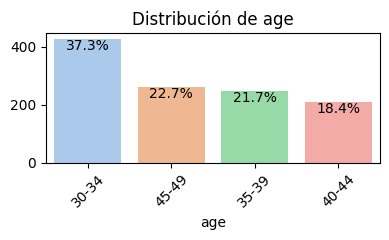

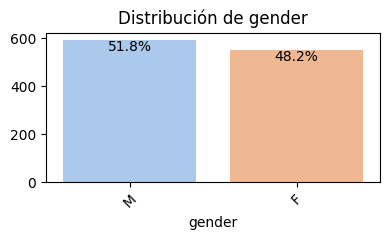

In [9]:
# Lista variables categóricas
categoric_cols = df.select_dtypes(include=['object'])

# Visualización variables categóricas
def visualize_categoric_variables(df, categoric_cols):
    """Visualización de distribuciones"""
    for col in categoric_cols:
        plt.figure(figsize=(4, 2.5))

        # Gráfico de barras con porcentajes
        value_counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100

        sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel')
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)

        # Añadir etiquetas de porcentaje
        for i, v in enumerate(value_counts.values):
            plt.text(i, v, f'{percentages[i]:.1f}%',
                    ha='center', va='top')

        plt.tight_layout()
        plt.show()

visualize_categoric_variables(df, categoric_cols=categoric_cols)

La imagen muestra un gráfico de barras que representa la distribución por edades.

**30-34 años**

- Porcentaje: 37.3%
- Es el grupo más numeroso, representado con una barra azul
- Aproximadamente 400 individuos en este rango

**45-49 años**

- Porcentaje: 22.7%
- Segundo grupo más grande, representado con una barra naranja
- Aproximadamente 250 individuos

**35-39 años**

- Porcentaje: 21.7%
- Tercer grupo por tamaño, representado con una barra verde
- Ligeramente menor que el grupo de 45-49 años

**40-44 años**

- Porcentaje: 18.4%
- El grupo más pequeño, representado con una barra roja
- Aproximadamente 200 individuos

**Insights relevantes**

- Concentración en adultos jóvenes: El grupo de 30-34 años representa más de un tercio de toda la población analizada (37.3%), lo que indica una clara concentración en este segmento de adultos jóvenes.
- Es interesante notar que el grupo de 40-44 años tiene menor representación que los grupos adyacentes, lo que podría representar una especie de "valle" generacional.
- Audiencia predominantemente joven: Sumando los dos grupos más jóvenes (30-34 y 35-39), representan el 59% de la población total, lo que indica una audiencia predominantemente joven.
- Esta distribución podría ser crucial para estrategias de marketing segmentadas, diseño de productos o servicios, ya que muestra una clara predominancia del grupo de 30-34 años.

Estos datos sugieren que cualquier estrategia debería considerar prioritariamente al segmento de 30-34 años, pero sin descuidar los otros tres grupos que, aunque menores, representan en conjunto más del 60% de la población analizada.

## **4. Análisis de Conversión**

El proposito de este análisis es conocer como los clientes interactuaron con los Ads publicitarios y como estas interacciones se traducieron en ventas exitosas. Para esto calcularemos los siguientes indicadores.

- **Click-Through Rate (CTR)**: porcentaje de impresiones "impressions" que resultaron en clicks de clientes en el Ad publicitario. Un alto CTR indica que el Ad fue exitoso en lograr que los cliente den clic.
- **Total Conversion Rate (TCR)**: porcentaje de clicks de clientes que resultaron en algun tipo de conversión. Muestra la efectividad general de convertir clics en cualquier forma de conversión.
- **Approved Conversion Rate**: porcentaje de clicks de clientes que resultaron en conversiones aprobadas. Se enfoca específicamente en las conversiones que fueron aprobadas (personas que compraron el producto después de ver el anuncio), lo cual puede ser crítico dependiendo de los objetivos de la campaña.
- **Cost Per Click (CPC)**: el costo que asume la empresa por cada click de clientes. Valores bajos son generalmente mejores, ya que indican eficiencia en el costo de alcanzar clicks de clientes y conversiones.
- **Cost Per Conversion**: el costo que asume la empresa por cada click que resulto en alguna conversión. Valores bajos son generalmente mejores, ya que indican eficiencia en el costo de alcanzar clicks de clientes y conversiones.

Donde:

$
    \small
    \textbf{Click-Through Rate} = \frac{\text{Clicks}}{\text{Impressions}} \times 100\% \\
    \small
    \textbf{Total Conversion Rate} = \frac{\text{Total_Conversion}}{\text{Clicks}} \times 100\% \\
    \small
    \textbf{Approved Conversion Rate} = \frac{\text{Approved_Conversion}}{\text{Clicks}} \times 100\% \\
    \small
    \textbf{Cost Per Click} = \frac{\text{Spent}}{\text{Clicks}} \\
    \small   
    \textbf{Cost Per Conversion} = \frac{\text{Spent}}{\text{Total_Conversion}}
$

In [10]:
# Calculo de indicadores de conversión
def convertion_calculation(df):
    df['Click_Through_Rate'] = (df['Clicks'] / df['Impressions']) * 100
    df['Total_Conversion_Rate'] = (df['Total_Conversion'] / df['Clicks']) * 100
    df['Approved_Conversion_Rate'] = (df['Approved_Conversion'] / df['Clicks']) * 100
    df['Cost_Per_Click'] = df['Spent'] / df['Clicks']
    df['Cost_Per_Conversion'] = df['Spent'] / df['Total_Conversion']

    return df

df = convertion_calculation(df)

# Reemplazamos valores 1/0 = inf pro valores faltantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)

conversion_columns = [
    'Click_Through_Rate', 'Total_Conversion_Rate', 'Approved_Conversion_Rate',
    'Cost_Per_Click', 'Cost_Per_Conversion'
]

df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,200.0,100.0,1.43,0.715
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,100.0,0.0,0.91,0.910
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN,NaN,0.000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,100.0,0.0,1.25,1.250
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.0,100.0,1.29,1.290


### **4.1. Estadísticos Descriptivos Indicadores de Conversión**
Analizaremos las medidas de tendencia y dispersión de las variables para entender:
- Distribuciones
- Valores nulos
- Valores atípicos

In [11]:
# Análisis descriptivo de los indicadores
analyze_numeric_variables(df[conversion_columns], type_list=["int64", "float64"])

,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
conteo_registros,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
conteo_nulos,0.000000,207.000000,207.000000,207.000000,8.000000
porcentaje_nulos,0.000000,18.110236,18.110236,18.110236,0.699913
promedio,0.016420,29.515203,10.903023,1.499347,16.129614
desv_std,0.011506,38.724016,24.703240,0.232879,24.345658
min,0.000000,0.000000,0.000000,0.180000,0.000000
25%,0.010022,5.870098,0.000000,1.390000,1.390000
50%,0.015981,12.876830,1.253931,1.498273,8.336667
75%,0.023364,33.333333,6.666667,1.644364,21.559808
max,0.105932,400.000000,200.000000,2.212000,332.989999


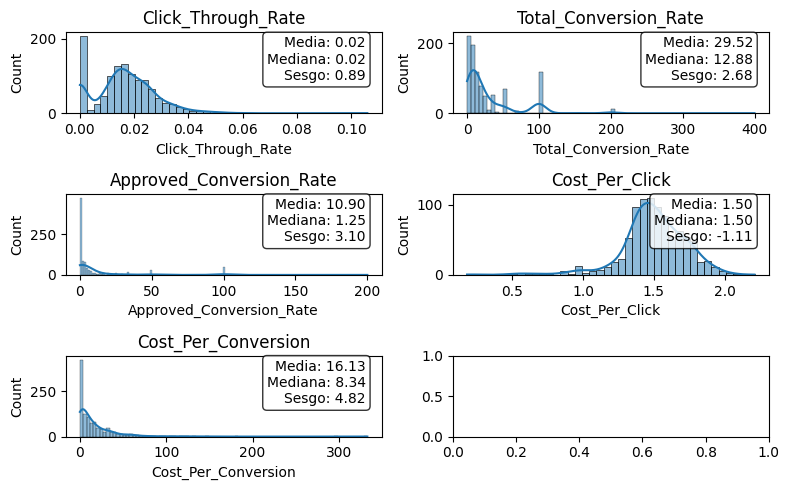

In [12]:
# Visualización de los indicadores
visualize_numeric_variables(df, numeric_cols=conversion_columns)

#### **Insights relevantes**

- **Click-Through Rate (CTR)**
 - Tengamos en cuenta que lo deseable es un mayor CTR, dado que la tasa de impresiones que resultaron en clics es alta.
 - El CTR promedio es de 0.016%. Esto significa que, en promedio, se genera 1 clic por cada 6250 impresiones.
 - Más de 200 anuncios tienen un CTR del 0%, lo que indica que no se ha hecho ningún clic en absoluto.

- **Total Conversion Rate (TCR)**
 - Tiene un sesgo grande hacia la izquierda. Indicando que en la mayoria de casos un click no resulto en una conversión.
 - Hay algunos anuncios que tienen un TCR superior a 100, lo que significa que el número total de personas que consultaron sobre el producto después de ver el anuncio es mayor que el número de personas que hicieron clic en ese anuncio. Esto puede deberse a que una sola persona que hizo clic puede hacer consultas.
 - El TCR máximo está alrededor de 400. Esto indica que al menos en un anuncio, 4 veces más personas consultaron el anuncio en comparación con las que hicieron clic en él.

- **Approved Conversion Rate**
 - Tiene un sesgo grande hacia la izquierda. Indicando que en la mayoria de veces el cliente no puso atención al Ad.

- **Cost Per Click (CPC)**
 - En promedio el costo por cada click de un cliente es 1.5.
 - En general, dada la distribución y desviación estandar, el costo por click no varia mayormente respecto a la media.
 - El costo maximo por click es de 2.5.

- **Cost Per Conversion**
 - Tiene un sesgo grande hacia la izquierda.
 - Al menos un Ad costo mas de 300 para alcanzar una conversión.


### **4.2. Análisis Segmentado**
Analizaremos como se comportan los indicadores de conversión por segmentos:
- Edad
- Género

### **4.2.1. Edad**

In [13]:
cols_to_analyse = ['Spent', 'Click_Through_Rate', 'Total_Conversion_Rate', 'Approved_Conversion_Rate', 'Cost_Per_Click', 'Cost_Per_Conversion']

In [14]:
# Por edad
age_analysis = df.groupby('age').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum',
    'Spent': 'sum'
}).reset_index()

age_analysis = convertion_calculation(age_analysis)

age_analysis.head()

,age,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,30-34,67993019,9483,1431,494,15252.399986,0.013947,15.090161,5.209322,1.608394,10.658560
1,35-39,42104644,7094,626,207,11112.429994,0.016848,8.824359,2.917959,1.566455,17.751486
2,40-44,39604307,7736,523,170,11589.729981,0.019533,6.760600,2.197518,1.498155,22.160096
3,45-49,63732858,13852,684,208,20750.669997,0.021734,4.937915,1.501588,1.498027,30.337237


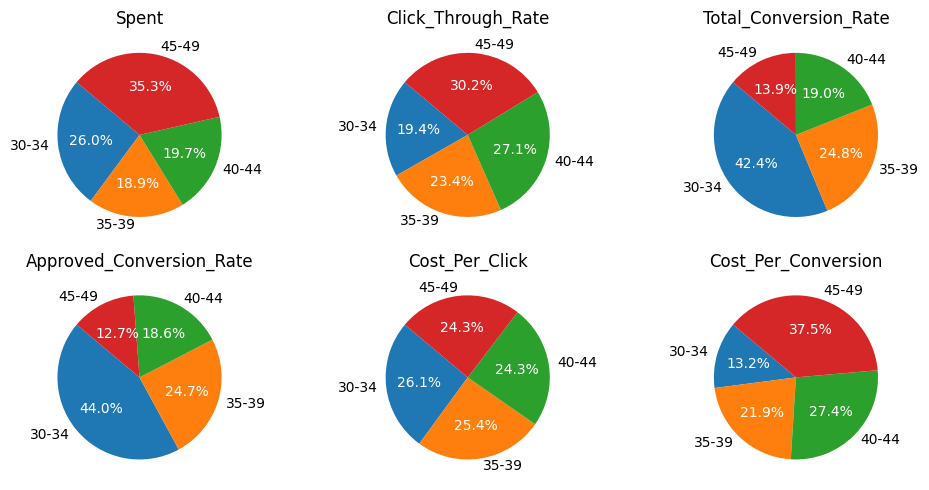

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

# Define colors for the pie chart
colors = sns.color_palette()[0:len(age_analysis['age'])]

for i, col in enumerate(cols_to_analyse):
    wedges, texts, autotexts = axes[i].pie(age_analysis[col],
                                           labels=age_analysis['age'],
                                           colors=colors,
                                           autopct='%1.1f%%',
                                           startangle=140)
    axes[i].set_title(f'{col}')

    for text in autotexts:
        text.set_color('white')

plt.tight_layout()
plt.show()

La imagen muestra seis gráficos de pastel que representan las métricas de rendimiento publicitario segmentadas por grupos de edad.

**Spent (Gasto)**

- Grupo 45-49: 35.3% (mayor porcentaje)
- Grupo 35-39: 18.9% (menor porcentaje)

**Click_Through_Rate (CTR)**

- Grupo 45-49: 30.2% (mayor porcentaje)
- Grupo 30-34: 19.4% (menor porcentaje)

**Total_Conversion_Rate (Tasa de Conversión Total)**

- Grupo 30-34: 42.4% (mayor porcentaje)
- Grupo 45-49: 13.9% (menor porcentaje)

**Approved_Conversion_Rate (Tasa de Conversión Aprobada)**

- Grupo 30-34: 44.0% (mayor porcentaje)
- Grupo 45-49: 12.7% (menor porcentaje)

**Cost_Per_Click (CPC)**

- Grupo 30-34: 26.1% (mayor porcentaje)

**Cost_Per_Conversion (Costo por Conversión)**

- Grupo 45-49: 37.5% (mayor porcentaje)
- Grupo 30-34: 13.2% (menor porcentaje)

**Insights relevantes**

- Desequilibrio entre inversión y rendimiento: el grupo de 45-49 años recibe la mayor proporción del gasto publicitario (35.3%), pero genera la menor proporción de conversiones tanto totales (13.9%) como aprobadas (12.7%). Esto indica una asignación ineficiente del presupuesto.
- Eficiencia del grupo más joven: El segmento de 30-34 años muestra el mejor rendimiento:

 - Representa el 26% del gasto
 - Genera el 42.4% de las conversiones totales
 - Produce el 44% de las conversiones aprobadas
 - Tiene el menor costo por conversión (13.2% del total)

- Paradoja del CTR: Existe una relación inversa entre CTR y conversión. El grupo 45-49 tiene el mejor CTR (30.2%) pero el peor rendimiento de conversión, mientras que el grupo 30-34 tiene el peor CTR (19.4%) pero el mejor rendimiento de conversión. Esto sugiere que:

 - Los usuarios mayores están más dispuestos a hacer clic en los anuncios
 - Los usuarios más jóvenes son más propensos a completar la compra después de hacer clic

- Costo por clic equilibrado: La distribución del costo por clic es relativamente uniforme entre los grupos de edad, lo que indica que la plataforma publicitaria cobra de manera similar independientemente del grupo demográfico.
- Retorno de inversión por grupo de edad: Calculando la relación entre conversiones y gasto:

 - Grupo 30-34: mejor ROI (44.0% de conversiones aprobadas por 26.0% del gasto)
 - Grupo 35-39: ROI equilibrado (24.7% de conversiones aprobadas por 18.9% del gasto)
 - Grupo 40-44: ROI ligeramente negativo (18.6% de conversiones aprobadas por 19.7% del gasto)
 - Grupo 45-49: ROI muy negativo (12.7% de conversiones aprobadas por 35.3% del gasto)

- Oportunidad de optimización: Redistribuir el presupuesto para alinearlo mejor con el rendimiento de conversión podría aumentar significativamente la eficiencia general de la campaña, especialmente reduciendo la inversión en el grupo 45-49 y aumentándola en el grupo 30-34.

Estos datos sugieren una estrategia clara: priorizar la inversión en el segmento de 30-34 años, que demuestra ser el más eficiente y rentable, mientras se reconsideran los objetivos y el enfoque para el grupo de 45-49 años, que actualmente consume una gran parte del presupuesto con retornos proporcionalmente bajos.

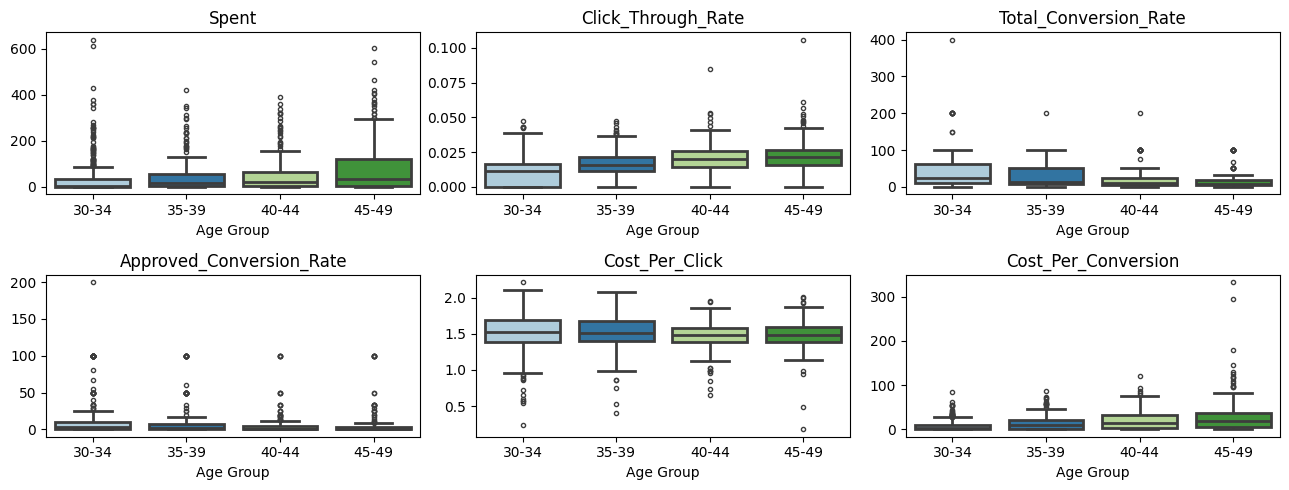

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(13, 5))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyse):

    sns.boxplot(x='age', y=col, data=df, ax=axes[i],
                linewidth=2.0, fliersize=3.0, palette="Paired")

    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel(None)

plt.tight_layout()
plt.show()

La imagen muestra seis gráficos de caja (boxplots) que representan diferentes métricas de rendimiento publicitario segmentadas por grupos de edad.

**Spent (Gasto)**

- Tendencia creciente con la edad
- Todos los grupos muestran valores atípicos altos, con algunos gastos superiores a 400-600

**Click_Through_Rate (CTR)**

- Ligera tendencia creciente con la edad
- Valores atípicos (>0.1) en el grupo 45-49

**Total_Conversion_Rate (Tasa de Conversión Total)**

- Tendencia decreciente con la edad
- Valores atípicos muy altos (>300) en el grupo 30-34

**Approved_Conversion_Rate (Tasa de Conversión Aprobada)**

- Tendencia decreciente con la edad
- Valores atípicos significativos en todos los grupos, llegando a ~200 en el grupo 30-34

**Cost_Per_Click (CPC)**

- Bastante constante entre grupos
- Mediana en todos los grupos: ~1.5
- Dispersión y rango similar en todos los grupos de edad

**Cost_Per_Conversion (Costo por Conversión)**

- Tendencia creciente con la edad
- Mayor dispersión y valores atípicos en los grupos de mayor edad

**Insights relevantes**

- Variabilidad dentro de los grupos: los boxplots revelan una gran variabilidad dentro de cada grupo de edad, con numerosos valores atípicos en todas las métricas. Esto sugiere que la edad no es el único factor determinante del rendimiento.
- Relación inversamente proporcional entre conversión y edad: A medida que aumenta la edad, disminuye la tasa de conversión (tanto total como aprobada). Esta tendencia es consistente y marcada.

- Eficiencia del grupo 30-34: este segmento muestra:

 - Menor gasto mediano
 - Mayor tasa de conversión mediana
 - Menor costo por conversión mediano
 - Esto confirma que es el grupo más eficiente en términos de retorno de inversión.

- Paradoja del gasto: el grupo 45-49 recibe el mayor gasto mediano, pero muestra:

 - Menor tasa de conversión
 - Mayor costo por conversión
 - Esta inversión parece ineficiente basándose en los resultados.

- Consistencia del CPC: El costo por clic es notablemente similar entre todos los grupos de edad, lo que sugiere que la plataforma publicitaria no discrimina por edad en términos de precios.
- Distribución asimétrica: Todas las métricas muestran distribuciones asimétricas con colas largas hacia valores altos, lo que indica la presencia de algunos casos extremadamente exitosos (o costosos) en cada grupo.
- Oportunidad de segmentación más precisa: La alta variabilidad dentro de cada grupo sugiere que podría haber subgrupos específicos dentro de cada segmento de edad que responden excepcionalmente bien (representados por los valores atípicos superiores).

Este análisis de boxplots complementa los gráficos anteriores, proporcionando insights adicionales sobre la dispersión y los valores extremos dentro de cada grupo de edad. La conclusión principal sigue siendo que el grupo 30-34 ofrece el mejor rendimiento, mientras que el grupo 45-49 muestra la menor eficiencia a pesar de recibir la mayor inversión.

### **4.2.2. Género**

In [17]:
# Por género
gender_analysis = df.groupby('gender').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum',
    'Spent': 'sum'
}).reset_index()

gender_analysis = convertion_calculation(gender_analysis)

gender_analysis.head()

,gender,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,F,114862847,23878,1644,495,34502.619963,0.020788,6.884999,2.073038,1.444954,20.986995
1,M,98571981,14287,1620,584,24202.609995,0.014494,11.338979,4.087632,1.694030,14.939883


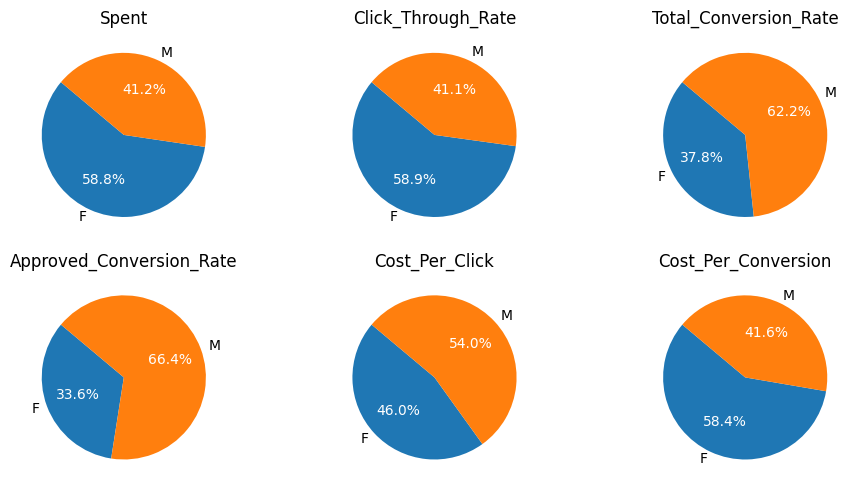

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyse):
    wedges, texts, autotexts = axes[i].pie(gender_analysis[col],
                                           labels=gender_analysis['gender'],
                                           colors=colors,
                                           autopct='%1.1f%%',
                                           startangle=140)
    axes[i].set_title(f'{col}')

    for text in autotexts:
        text.set_color('white')

plt.tight_layout()
plt.show()

La imagen muestra seis gráficos de pastel que comparan diferentes métricas de rendimiento publicitario segmentadas por género (F y M)

**Spent (Gasto)**

Mujeres (F): 58.8% del gasto total
Hombres (M): 41.2% del gasto total
Se destina aproximadamente un 17.6% más de presupuesto al segmento femenino

**Click_Through_Rate (CTR)**

Mujeres (F): 58.9% del CTR total
Hombres (M): 41.1% del CTR total
La proporción es casi idéntica a la del gasto, lo que sugiere una eficiencia similar en generar clics

**Total_Conversion_Rate (Tasa de Conversión Total)**

Hombres (M): 62.2% de las conversiones totales
Mujeres (F): 37.8% de las conversiones totales
El segmento masculino genera un 24.4% más de conversiones totales

**Approved_Conversion_Rate (Tasa de Conversión Aprobada)**

Hombres (M): 66.4% de las conversiones aprobadas
Mujeres (F): 33.6% de las conversiones aprobadas
El segmento masculino genera un 32.8% más de conversiones aprobadas

**Cost_Per_Click (CPC)**

Hombres (M): 54.0% del costo por clic
Mujeres (F): 46.0% del costo por clic
Los clics masculinos son aproximadamente un 8% más costosos

**Cost_Per_Conversion (Costo por Conversión)**

Hombres (M): 41.6% del costo por conversión
Mujeres (F): 58.4% del costo por conversión
Las conversiones femeninas son aproximadamente un 16.8% más costosas

**Insights relevantes**

- Desequilibrio entre inversión y resultados: existe una clara desproporción entre la asignación de presupuesto y los resultados obtenidos:

 - Se destina el 58.8% del presupuesto al segmento femenino, pero este segmento solo genera el 33.6% de las conversiones aprobadas

- Eficiencia por género: el segmento masculino demuestra una eficiencia notablemente superior:

 - Recibe el 41.2% del presupuesto
 - Genera el 66.4% de las conversiones aprobadas
 - Representa solo el 41.6% del costo por conversión total

- Relación CTR vs. Conversión: los datos revelan patrones de comportamiento diferentes:

 - Las mujeres y hombres generan clics en proporción similar a la inversión (F: 58.9% vs M: 41.1%).
 - Sin embargo, los hombres convierten mucho mejor después del clic (66.4% de conversiones aprobadas).

- ROI por género: calculando la relación entre conversiones y gasto:

 - Hombres: Generan el 66.4% de conversiones aprobadas con solo el 41.2% del presupuesto (ratio favorable de 1.61)
 - Mujeres: Generan el 33.6% de conversiones aprobadas con el 58.8% del presupuesto (ratio desfavorable de 0.57)
 - Esto significa que el ROI masculino es aproximadamente 2.8 veces mejor que el femenino

- Costo por conversión: la distribución del 58.4% del costo por conversión para mujeres vs. 41.6% para hombres confirma que:

 - Las conversiones femeninas son considerablemente más costosas
 - Existe una oportunidad significativa de optimización presupuestaria

- Oportunidad de optimización: una redistribución del presupuesto a favor del segmento masculino podría aumentar significativamente el rendimiento global de la campaña, dado que:

 - Los hombres generan el doble de conversiones aprobadas con menos presupuesto.
 - El costo por conversión masculino es proporcionalmente menor.

Estos hallazgos indican una clara estrategia de optimización: redistribuir parte del presupuesto del segmento femenino hacia el masculino para maximizar el retorno de inversión, mientras se analiza por qué las mujeres, a pesar de generar clics proporcionales a la inversión, no completan el proceso de conversión con la misma eficiencia que los hombres.

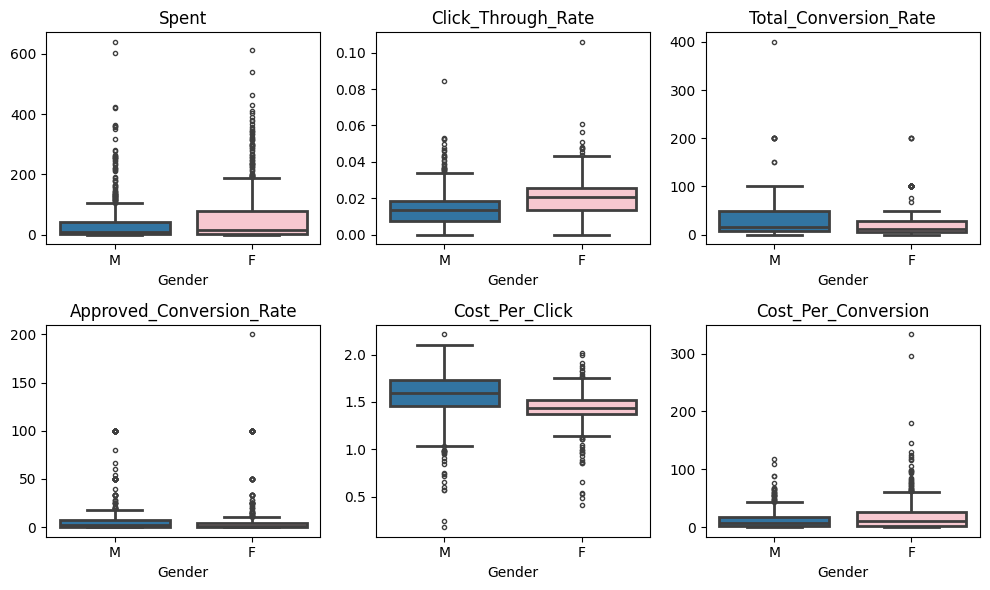

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyse):

    sns.boxplot(x='gender', y=col, data=df, ax=axes[i],
                linewidth=2.0, fliersize=3.0, palette=['C0', 'pink'])

    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(None)

plt.tight_layout()
plt.show()

La imagen muestra seis gráficos de caja (boxplots) que comparan diferentes métricas de rendimiento publicitario segmentadas por género (F y M).

**Spent (Gasto)**

- Mujeres (F): Mayor mediana (~75)
- Hombres (M): Menor mediana (~40)
- Ambos géneros muestran valores atípicos altos, llegando a más de 600
- Mayor dispersión en el segmento femenino

**Click_Through_Rate (CTR)**

- Mujeres (F): Mayor mediana (~0.02)
- Hombres (M): Menor mediana (~0.015)
- Ambos géneros muestran valores atípicos, con CTR extremos superiores a 0.10
- Mayor concentración de datos en el segmento femenino

**Total_Conversion_Rate (Tasa de Conversión Total)**

- Hombres (M): Mayor mediana (~20)
- Mujeres (F): Menor mediana (~10)
- Valores atípicos muy altos en ambos géneros, llegando a 400
- Mayor dispersión en el segmento masculino

**Approved_Conversion_Rate (Tasa de Conversión Aprobada)**

- Ambos géneros tienen medianas similares (~5-10)
- Valores atípicos significativos, llegando a 200
- Distribución muy concentrada cerca de valores bajos en ambos géneros

**Cost_Per_Click (CPC)**

- Hombres (M): Mayor mediana (~1.6)
- Mujeres (F): Menor mediana (~1.5)
- Rango intercuartílico más amplio en hombres, indicando mayor variabilidad
- Ambos géneros tienen rangos similares de valores atípicos

**Cost_Per_Conversion (Costo por Conversión)**

- Mujeres (F): Mayor mediana (~20)
- Hombres (M): Menor mediana (~15)
- Valores atípicos extremos en el segmento femenino, llegando a más de 300
- Mayor dispersión en los datos femeninos

**Insights relevantes**

- Variabilidad dentro de los géneros: los boxplots revelan una gran variabilidad dentro de cada género, con numerosos valores atípicos en todas las métricas. Esto sugiere que el género no es el único factor determinante del rendimiento.

- Paradoja de inversión y conversión: se invierte más en el segmento femenino (mayor gasto mediano), pero el segmento masculino tiene mejor tasa de conversión total. Esto sugiere una asignación subóptima del presupuesto.
Comportamiento de navegación por género:

 - Las mujeres tienen mejor CTR (más propensas a hacer clic en anuncios)
 - Los hombres tienen mejor tasa de conversión total (más propensos a completar la compra)
 - Este patrón sugiere diferentes comportamientos en el embudo de compra según el género

- Eficiencia del segmento masculino: a pesar de recibir menos presupuesto:

 - Tiene mejor tasa de conversión total
 - Muestra menor costo por conversión mediano
 - Esto indica mayor eficiencia en términos de retorno de inversión

- Distribución asimétrica de resultados: todas las métricas muestran distribuciones asimétricas con muchos valores extremos (outliers), lo que indica que existen casos particulares con rendimiento excepcionalmente bueno o malo en ambos géneros.
- Oportunidad de optimización de presupuesto: los datos sugieren que redistribuir parte del presupuesto del segmento femenino al masculino podría mejorar el rendimiento global de la campaña.
- Segmentación adicional necesaria: la gran dispersión y los numerosos valores atípicos sugieren que podría haber otros factores (además del género) que afectan significativamente el rendimiento. Sería beneficioso realizar un análisis multivariable que considere otros criterios de segmentación.

Estos hallazgos complementan los análisis anteriores, proporcionando una visión más detallada sobre la distribución y variabilidad de los datos dentro de cada género. La conclusión principal se mantiene: el segmento masculino muestra mejor eficiencia, mientras que el femenino recibe más inversión, lo que sugiere una oportunidad clara de optimización.

### **4.3. Análisis Performance de Campaña**
Analizaremos el performance (efectividad) de cada campaña con base en los ratios de conversión y la eficiencia de costos. De igual manera identificaremos los Ads con mayores ratios de conversión y bajos costos.

### **4.3.1. Performance por Campaña**

In [20]:
# Performance por campaña
df_filtro = df[df['Clicks'] > 0]

campaign_performance = df_filtro.groupby('xyz_campaign_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

campaign_performance = convertion_calculation(campaign_performance)

# Ordenar por Total Conversion Rate (TCR)
campaign_performance = campaign_performance.sort_values(by='Total_Conversion_Rate', ascending=False)
campaign_performance.head()

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Click_Through_Rate,Total_Conversion_Rate,Approved_Conversion_Rate,Cost_Per_Click,Cost_Per_Conversion
0,916,448046,113,149.710001,39,16,0.025221,34.513274,14.159292,1.324867,3.838718
1,936,7797942,1984,2893.369999,356,118,0.025443,17.943548,5.947581,1.458352,8.127444
2,1178,204699959,36068,55662.149959,2657,869,0.017620,7.366641,2.409338,1.543256,20.949247


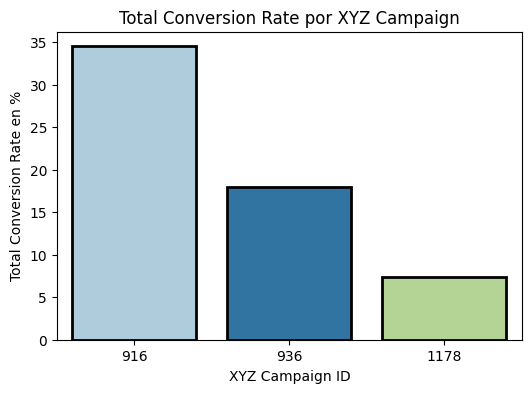

In [21]:
plt.figure(figsize=(6, 4))

sns.barplot(data=campaign_performance,
            x='xyz_campaign_id', y='Total_Conversion_Rate',
            edgecolor='black', linewidth=2.0,
            palette='Paired')
plt.title('Total Conversion Rate por XYZ Campaign')
plt.xlabel('XYZ Campaign ID')
plt.ylabel('Total Conversion Rate en %')

plt.show()

La imagen muestra un gráfico de barras que representa la Tasa de Conversión Total por Campaña XYZ.

**Campaña ID 916**

- Tasa de conversión: Aproximadamente 34.5%
- Representada con una barra de color azul claro
- Es la campaña con el mejor rendimiento de conversión

**Campaña ID 936**

- Tasa de conversión: Aproximadamente 18%
- Representada con una barra de color azul oscuro
- Ocupa el segundo lugar en rendimiento

**Campaña ID 1178**

- Tasa de conversión: Aproximadamente 7.5%
- Representada con una barra de color verde claro
- Es la campaña con el rendimiento más bajo

**Insights relevantes**

- Diferencias significativas entre campañas: existe una variación sustancial en el rendimiento, donde la campaña 916 tiene una tasa de conversión aproximadamente 4.6 veces mayor que la campaña 1178 y casi el doble que la campaña 936.
- Campaña 916 como referente: esta campaña ha logrado una tasa de conversión excepcionalmente alta (34.5%), lo que sugiere que su estrategia, targeting o mensaje está funcionando muy bien y podría servir como modelo para optimizar las otras campañas.
- Campaña 1178 requiere atención: con solo un 7.5% de tasa de conversión, esta campaña está significativamente por debajo del rendimiento de las otras. Requiere una revisión urgente para identificar qué factores están limitando su efectividad.
- Patrón de disminución por ID: parece haber una correlación negativa entre el número de ID de la campaña y su rendimiento. Esto podría sugerir que las campañas más recientes (asumiendo que IDs más altos corresponden a campañas más nuevas) están teniendo peor desempeño, lo que podría indicar problemas con los cambios recientes en la estrategia de marketing.
- Oportunidad de optimización: el amplio rango de resultados (desde 7.5% hasta 34.5%) sugiere que hay una gran oportunidad para mejorar las campañas con menor rendimiento mediante la aplicación de las mejores prácticas de la campaña 916.

Si este gráfico se considera junto con los análisis anteriores sobre edad y género, se podría realizar un análisis cruzado para determinar si estas campañas están dirigidas a diferentes segmentos demográficos, lo que explicaría parte de la variación en el rendimiento.

### **4.3.2. Performance por Ads**

In [22]:
# Performance por Ad
df_filtro = df[df['Clicks'] > 0]

ad_performance = df_filtro.groupby('ad_id').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spent': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum'
}).reset_index()

ad_performance = convertion_calculation(ad_performance)

In [23]:
# Top 10 Ads
top_conversion_ads  = ad_performance.sort_values(by='Total_Conversion_Rate', ascending=False)
avg_total_tcr = df_filtro['Total_Conversion_Rate'].mean()
top_conversion_ads['% Mayor que la media'] = round(100 * (top_conversion_ads['Total_Conversion_Rate'] / avg_total_tcr), 2)
top_conversion_ads[['ad_id', 'Total_Conversion_Rate', '% Mayor que la media']].head(10)

,ad_id,Total_Conversion_Rate,% Mayor que la media
37,734290,400.0,1355.23
352,1121129,200.0,677.62
334,1121107,200.0,677.62
32,711623,200.0,677.62
189,777758,200.0,677.62
219,779622,200.0,677.62
236,780511,200.0,677.62
0,708746,200.0,677.62
330,1121101,200.0,677.62
305,951391,200.0,677.62


#### **Insights relevantes**

- El Ad con mayor TCR tiene un TCR 13 veces mayor al TCR promedio.
- Los siguientes top 10 Ads con mayor TCR, tienen un TCR 6 veces mayor que el TCR promedio.

In [24]:
# Ordenar por Total Conversion Rate (TCR)
lowest_cost_ads  = ad_performance.sort_values(by='Cost_Per_Conversion', ascending=True)
average_cost_per_conversion = df_filtro['Cost_Per_Conversion'].mean()
lowest_cost_ads['% Menor que la Media'] = 100 * (average_cost_per_conversion - lowest_cost_ads['Cost_Per_Conversion']) / average_cost_per_conversion
lowest_cost_ads[['ad_id', 'Cost_Per_Conversion', '% Menor que la Media']].head(10)

,ad_id,Cost_Per_Conversion,% Menor que la Media
174,777105,0.180,99.084618
69,736869,0.240,98.779491
37,734290,0.260,98.677782
94,747223,0.300,98.474363
315,951756,0.410,97.914963
219,779622,0.445,97.736972
189,777758,0.480,97.558981
134,776416,0.490,97.508127
258,781354,0.530,97.304709
78,737931,0.540,97.253854


#### **Insights relevantes**

- El Ad con menor costo no varia en mayor medida respecto al promedio de costo por conversión.

### **4.4. A/B Testing**
El objetivo de A/B testing es comparar los resultados de aplicar dos versiones de un mismo elemento (diseño de Ads, mensajes, etc.) a audiencias o segmentos de clientes similares. Para los datos en este análisis solo podemos simular como realizar un análisis A/B testing dado que no cumplimos con la condición explicada. Entonces, una verdadera prueba A/B involucraría:

- Misma audiencia: dividiendo la misma audiencia al azar en dos o más grupos.
- Variaciones controladas: mostrando a cada grupo una versión diferente del anuncio (por ejemplo, diferente creatividad, mensaje) mientras se mantienen constantes todas las demás variables.
- Comparación directa: Midiendo qué versión tiene un mejor rendimiento en términos de conversiones, clics u otra métrica específica.

#### **En general, seguiríamos los siguientes pasos**

- Definir hipótesis: ¿Qué estás probando?
- Aleatoriedad: asegúrate de que los usuarios se asignen al azar a los grupos.
- Realizar el experimento: recoger datos.
- Calcular métricas: como tasas de conversión.
- Pruebas de hipótesis: utiliza una prueba adecuada (por ejemplo, prueba z) para determinar la significancia.
- Conclusiones: toma una decisión basada en los resultados de la prueba estadística.

En el presente documento lo que podemos hacer es agrupar los anuncios por características similares (edad, género, etc.) y luego comparar cómo diferentes campañas (xyz_campaign_id, etc.) se desempeñan dentro de estos grupos.

In [25]:
# Campañas para A/B testing
campaign_ids = [916, 936, 1178]
df_campaigns = df[df['xyz_campaign_id'].isin(campaign_ids)]

# Agregar por campaña
summary_campaigns = df_campaigns.groupby('xyz_campaign_id').agg({
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Total_Conversion': 'sum'
}).reset_index()

summary_campaigns['Conversion Rate'] = summary_campaigns['Total_Conversion'] / summary_campaigns['Clicks']
summary_campaigns.head()

,xyz_campaign_id,Clicks,Impressions,Total_Conversion,Conversion Rate
0,916,113,482925,58,0.513274
1,936,1984,8128187,537,0.270665
2,1178,36068,204823716,2669,0.073999


In [26]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_campaigns['xyz_campaign_id'], df_campaigns['Total_Conversion'])

# Aplicar prueba de chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico chi-cuadrado: {chi2_stat:.4f}")
print(f"p-Value: {p_value:.4f}")

Estadístico chi-cuadrado: 368.5843
p-Value: 0.0000


In [27]:
# Utilizamos un nivel de significancia de 0.05
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en la conversión entre campañas.")
else:
    print("Fallamos en rechazar la hipótesis nula. No hay una diferencia significativa en la conversión entre campañas.")

Rechazamos la hipótesis nula. Hay una diferencia significativa en la conversión entre campañas.


**Insights relevantes**

- Rechazamos la hipótesis nula. Hay una diferencia significativa en la conversión entre campañas.

## **5. Recomendaciones estratégicas**

**Redistribuir el presupuesto hacia el segmento de 30-34 años**

El grupo de 30-34 años ha demostrado ser significativamente más rentable, generando el 44% de las conversiones aprobadas con solo el 26% del presupuesto. En contraste, el segmento de 45-49 años consume el 35.3% del presupuesto pero produce apenas el 12.7% de las conversiones aprobadas.

- Acción recomendada: Reasignar al menos un 15-20% del presupuesto desde el segmento de 45-49 años hacia el grupo de 30-34 años para aprovechar su eficiencia superior.

**Optimizar la inversión por género**

Los datos muestran un desequilibrio significativo en la eficiencia por género: el segmento masculino genera el 66.4% de las conversiones aprobadas con solo el 41.2% del presupuesto, mientras que el segmento femenino produce el 33.6% de las conversiones con el 58.8% del presupuesto.

- Acción recomendada: Incrementar la inversión en el segmento masculino y reducir proporcionalmente el gasto en el segmento femenino. Simultáneamente, investigar por qué las mujeres hacen clic pero no completan la compra, rediseñando la experiencia post-clic para mejorar su tasa de conversión.

**Replicar el éxito de la campaña 916**

La campaña 916 muestra un rendimiento excepcional con una tasa de conversión del 34.5%, en comparación con el 7.5% de la campaña 1178. Esto sugiere diferencias fundamentales en el enfoque o diseño.

- Acción recomendada: Realizar un análisis profundo de la campaña 916 para identificar los elementos clave de su éxito (mensajes, creatividad, segmentación) y aplicarlos a las otras campañas, especialmente a la 1178 que requiere una revisión urgente.

**Identificar y escalar los anuncios de alto rendimiento**

Existe una variación extrema en el rendimiento de los anuncios individuales, con algunos superando el promedio por más de 13 veces (como el anuncio ID 734290 con un TCR 1355% superior a la media).

- Acción recomendada: Analizar las características específicas de los 10 anuncios de mayor rendimiento e invertir más recursos en ellos. Crear variaciones A/B de estos anuncios exitosos para identificar qué elementos específicos impulsan su rendimiento superior.

**Optimizar la estrategia de bidding por grupo de edad**

Los datos de Cost Per Click (CPC) muestran variaciones significativas en la eficiencia por grupos de edad, con el segmento más joven mostrando mejor rendimiento a pesar de un CTR más bajo.

- Acción recomendada: Implementar una estrategia de bidding diferenciada por grupos de edad, con pujas más agresivas para el segmento de 30-34 años donde el ROI es mayor, y más conservadoras para el segmento de 45-49 años donde el costo por conversión es significativamente más alto.
